<a href="https://colab.research.google.com/github/Lkrasnop/Master-degree-Data_science_final_project/blob/data-visualization/class_of_data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn.objects as so

In [ ]:
class vizuallization:
   def __init__(self,
               path_for_df_normalized_final,
               preferable_gene_list_for_heatmap):


     self.path_for_df_normalized_final = path_for_df_normalized_final
     self.preferable_gene_list_for_heatmap = preferable_gene_list_for_heatmap

   def create_all_gene_cluster_map(self):
      #prepare the data frame - change name columns and group by gene from article
      df_normalized = pd.read_csv('{}'.format(self.path_for_df_normalized_final))
      df_normalized = df_normalized.drop(columns = ['Unnamed: 0'], index = 1)
      df_normalized.rename(columns={'normalized':"value"},inplace =True)
      grouped = df_normalized.groupby('article')

      for gene in df_normalized.article.unique():

        # Choose for specific gene
        gene_df = grouped.get_group(gene)

        # Pivot the data to create a matrix of probes
        probes_data = gene_df.pivot_table(index='age', columns='cg', values='value', aggfunc='mean')

        # Calculate the correlation matrix
        correlation_matrix = probes_data.corr()

        # Create a cluster map
        plt.figure(figsize=(8, 6))
        sns.clustermap(correlation_matrix, cmap='coolwarm', fmt=".2f", cbar=True)
        plt.title(f'Correlation Heatmap for Gene: {gene}')
        plt.show()


   def create_preferred_gene_cluster_map(self):
    #prepare the data frame - change name columns and group by gene from article
    df_normalized = pd.read_csv('{}'.format(self.path_for_df_normalized_final))
    df_normalized = df_normalized.drop(columns = ['Unnamed: 0'], index = 1)
    df_normalized.rename(columns={'normalized':"value"},inplace =True)
    grouped = df_normalized.groupby('article')

    for gene in self.preferable_gene_list_for_heatmap:

        # Choose for specific gene
        gene_df = grouped.get_group(gene)

        # Pivot the data to create a matrix of probes
        probes_data = gene_df.pivot_table(index='age', columns='cg', values='value', aggfunc='mean')

        # Calculate the correlation matrix
        correlation_matrix = probes_data.corr()

        # Create a cluster map
        plt.figure(figsize=(8, 6))
        sns.clustermap(correlation_matrix, cmap='coolwarm', fmt=".2f", cbar=True)
        plt.title(f'Correlation Heatmap for Gene: {gene}')
        plt.show()

In [ ]:
path_for_df_normalized_final= '/content/drive/MyDrive/Final Project Data Science Master/data preparation/df_normalized_final.csv'
preferable_gene_list_for_heatmap = ['ATG7', 'NBR1', 'ULK1', 'ULK2', 'WDR45'] # Activation of autophagy genes

test = vizuallization(path_for_df_normalized_final,
                                preferable_gene_list_for_heatmap)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

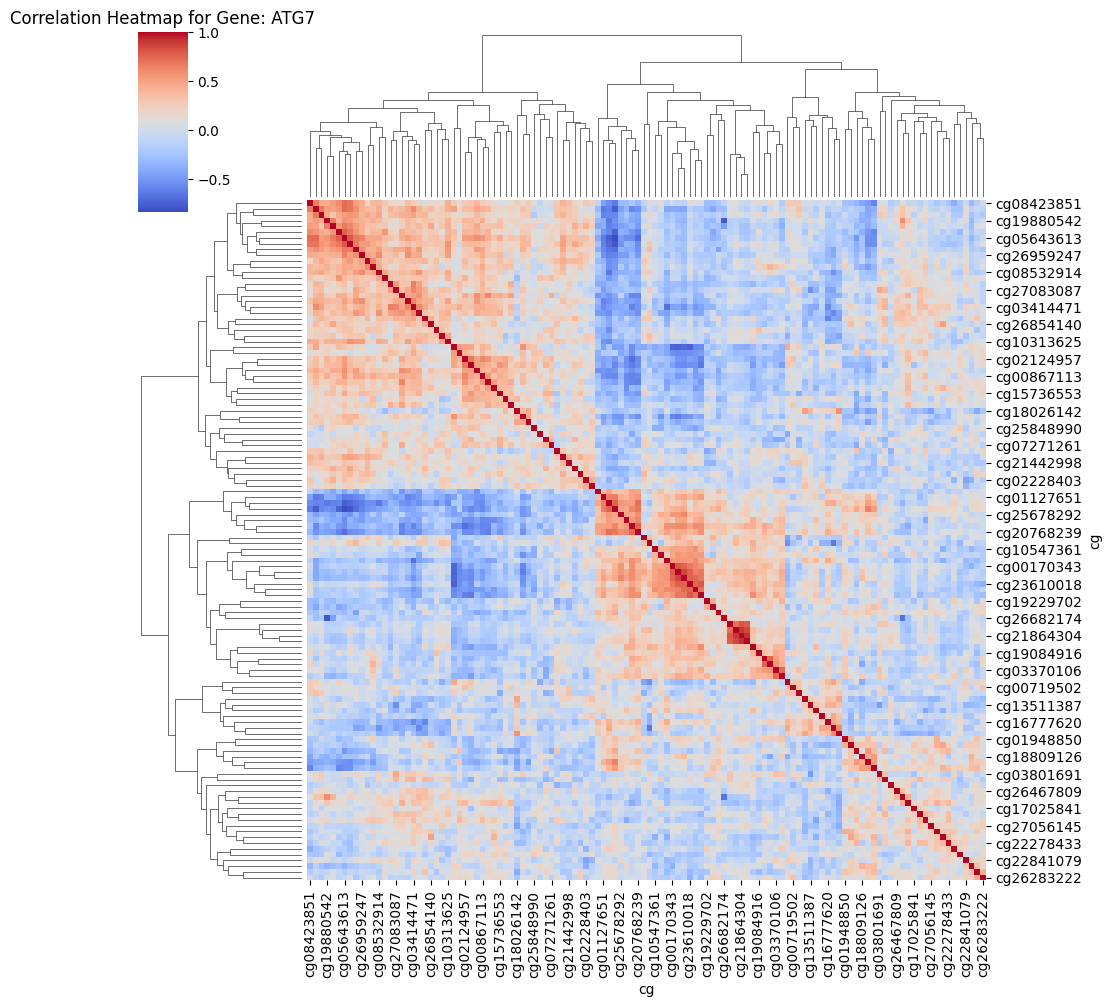

<Figure size 800x600 with 0 Axes>

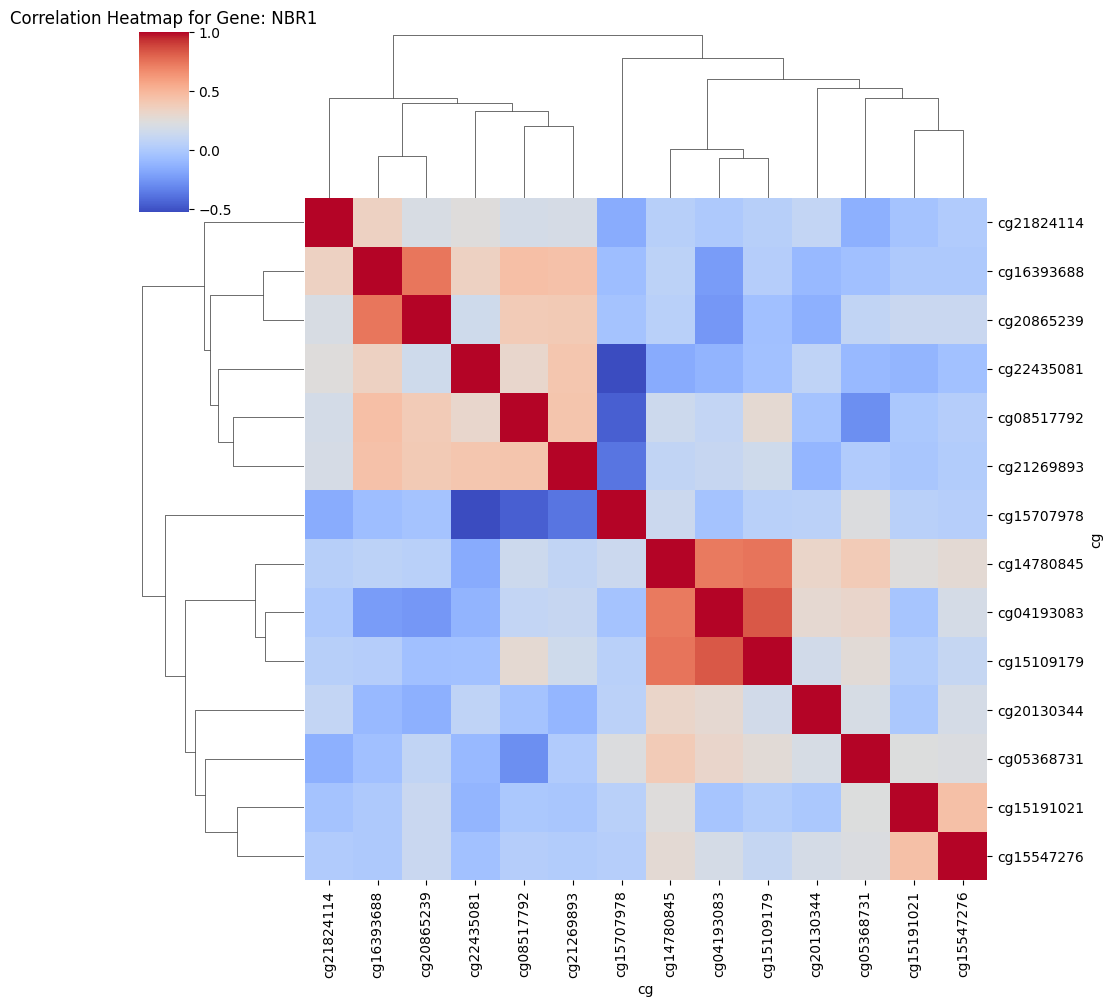

<Figure size 800x600 with 0 Axes>

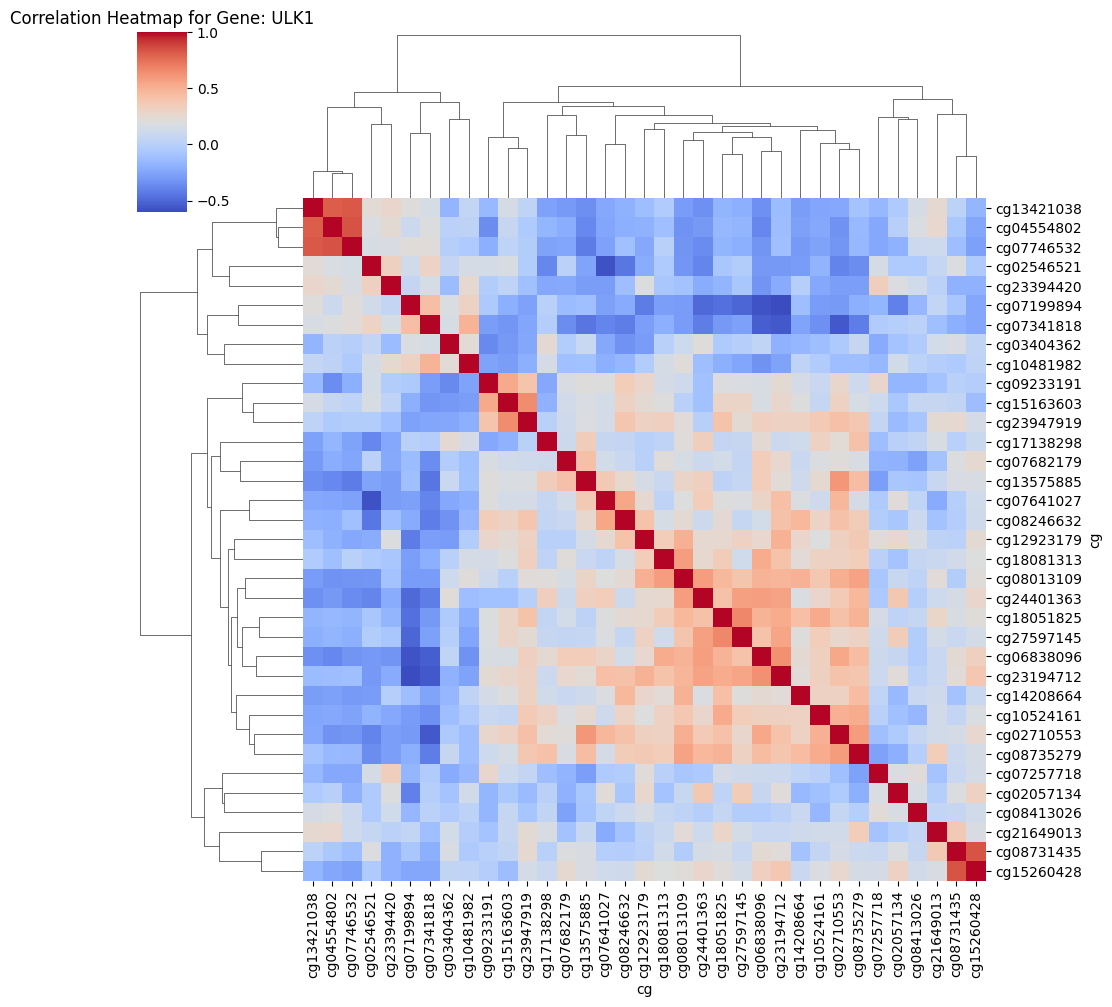

<Figure size 800x600 with 0 Axes>

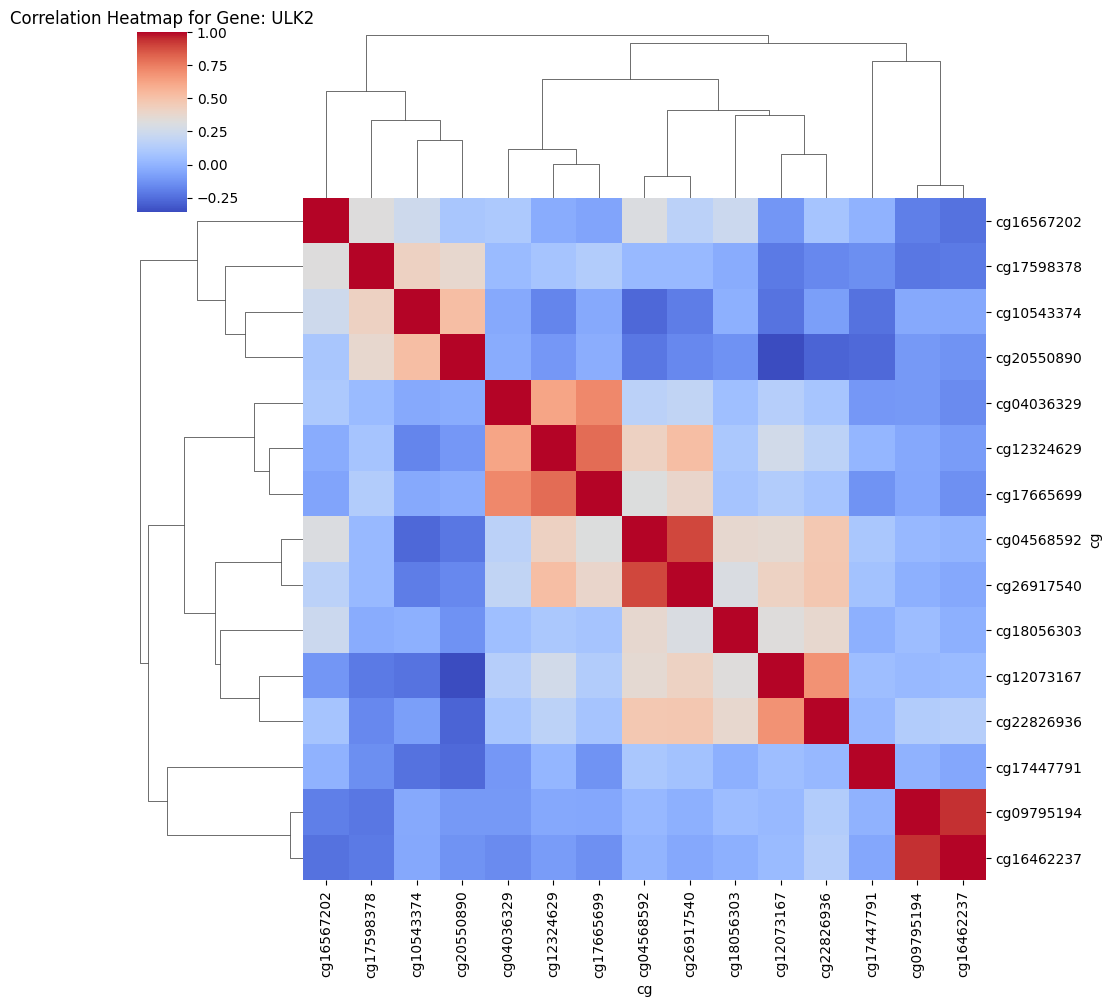

<Figure size 800x600 with 0 Axes>

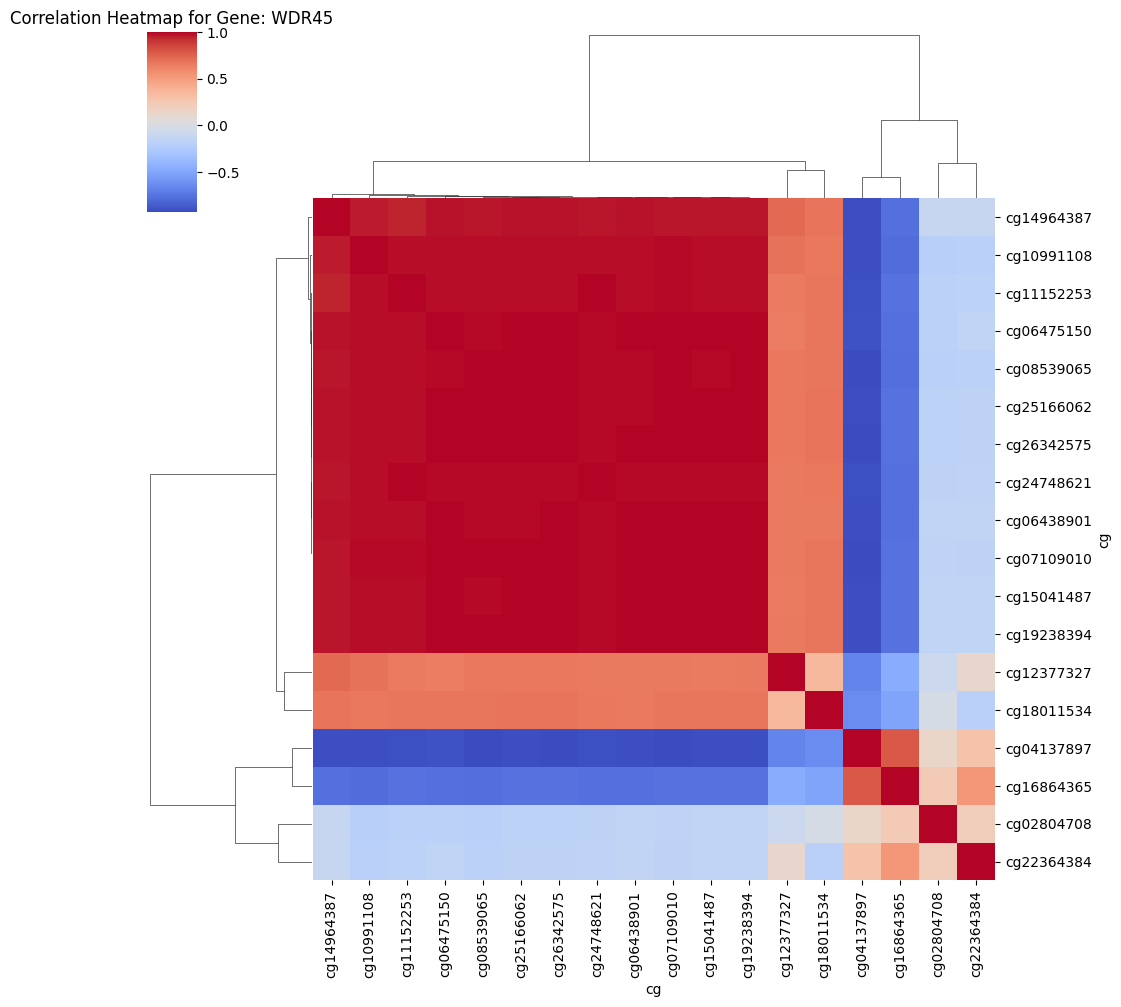

In [ ]:
test.create_gene_cluster_map()